In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the AIS Dataset
---

In [2]:
df=pd.read_csv('ais_data.csv')

In [3]:
df.head()

,mmsi,timestamp,lat,lon,speed
0,918683494,2024-01-01 08:31:00,37.494481,33.979287,3.46
1,276418858,2024-04-02 06:29:00,40.183902,1.396764,2.31
2,558332757,2024-01-25 19:47:00,33.697003,30.513222,3.20
3,795338498,2024-03-16 06:57:00,41.496871,-4.156036,14.70
4,356127203,2024-02-15 21:13:00,42.989312,3.705904,6.82


In [4]:
df.tail()

,mmsi,timestamp,lat,lon,speed
29995,356127203,2024-02-29 18:54:00,33.434338,28.691802,13.24
29996,276418858,2024-03-18 22:37:00,35.399747,21.956524,5.64
29997,476944677,2024-02-18 14:38:00,42.187326,7.513064,7.31
29998,982721837,2024-03-14 21:45:00,41.131724,32.373903,2.08
29999,155183357,2024-01-20 10:16:00,34.724840,5.484898,14.28


In [5]:
df.shape

(30000, 5)

In [6]:
df.describe()

,mmsi,lat,lon,speed
count,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,5.125594e+08,39.011645,15.438018,7.212393
std,2.479526e+08,3.458566,11.818379,4.111142
min,1.205894e+08,33.000066,-4.999523,2.000000
25%,2.800654e+08,36.006780,5.251404,3.250000
50%,5.583328e+08,39.020446,15.449226,6.700000
75%,7.438491e+08,42.030393,25.624249,10.870000
max,9.827218e+08,44.999905,35.995940,15.000000


In [7]:
df.columns

Index(['mmsi', 'timestamp', 'lat', 'lon', 'speed'], dtype='object')

Convert timestamp into real datetime
--

In [8]:
#Right now, timestamp is a string.

df['timestamp']=pd.to_datetime(df['timestamp'])
df.dtypes

mmsi                  int64
timestamp    datetime64[ns]
lat                 float64
lon                 float64
speed               float64
dtype: object

Sort data by vessel + time
---

In [9]:
df=df.sort_values(by=['mmsi','timestamp'])
df

,mmsi,timestamp,lat,lon,speed
12508,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10
16773,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46
10983,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64
22679,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57
19231,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04
...,...,...,...,...,...
17126,982721837,2024-05-17 17:48:00,33.573267,23.789495,8.27
19450,982721837,2024-05-17 21:41:00,41.984816,28.179263,12.40
19162,982721837,2024-05-18 04:52:00,39.565742,2.172077,9.68
27646,982721837,2024-05-18 12:51:00,35.501455,4.413825,7.47


Boat 111 — All points grouped + ordered by time

| mmsi | timestamp        | … |
| ---- | ---------------- | - |
| 111  | 2024-01-01 08:00 | … |
| 111  | 2024-01-01 09:00 | … |

Boat 222

| mmsi | timestamp        | … |
| ---- | ---------------- | - |
| 222  | 2024-01-02 11:30 | … |

Boat 333 — Sorted by time

| mmsi | timestamp        | … |
| ---- | ---------------- | - |
| 333  | 2024-01-04 09:00 | … |
| 333  | 2024-01-04 10:10 | … |



Describe speed
---

In [10]:
df['speed'].describe()

count    30000.000000
mean         7.212393
std          4.111142
min          2.000000
25%          3.250000
50%          6.700000
75%         10.870000
max         15.000000
Name: speed, dtype: float64

min speed ~2

max speed ~15

mean ~8

Show unique vessels
---

In [11]:
df['mmsi'].nunique()

50

There are total 50 boats(Vessels)

Clean the AIS Data
---

In [12]:

df=df.drop_duplicates()

In [13]:

df=df.loc[(df['speed']>=1)&(df['speed']<=20)]
df

,mmsi,timestamp,lat,lon,speed
12508,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10
16773,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46
10983,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64
22679,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57
19231,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04
...,...,...,...,...,...
17126,982721837,2024-05-17 17:48:00,33.573267,23.789495,8.27
19450,982721837,2024-05-17 21:41:00,41.984816,28.179263,12.40
19162,982721837,2024-05-18 04:52:00,39.565742,2.172077,9.68
27646,982721837,2024-05-18 12:51:00,35.501455,4.413825,7.47


<!-- Remove points on land (SKIP for now) -->

In [14]:

df=df.reset_index(drop=True)
df

,mmsi,timestamp,lat,lon,speed
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04
...,...,...,...,...,...
29995,982721837,2024-05-17 17:48:00,33.573267,23.789495,8.27
29996,982721837,2024-05-17 21:41:00,41.984816,28.179263,12.40
29997,982721837,2024-05-18 04:52:00,39.565742,2.172077,9.68
29998,982721837,2024-05-18 12:51:00,35.501455,4.413825,7.47


In [15]:
df.shape

(30000, 5)

Handling missing values
---

In [16]:
df.isna().sum()

mmsi         0
timestamp    0
lat          0
lon          0
speed        0
dtype: int64

CALCULATE TIME GAPS
---

In [17]:
# Sort the data

df=df.sort_values(by=['mmsi','timestamp'])
df

,mmsi,timestamp,lat,lon,speed
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04
...,...,...,...,...,...
29995,982721837,2024-05-17 17:48:00,33.573267,23.789495,8.27
29996,982721837,2024-05-17 21:41:00,41.984816,28.179263,12.40
29997,982721837,2024-05-18 04:52:00,39.565742,2.172077,9.68
29998,982721837,2024-05-18 12:51:00,35.501455,4.413825,7.47


Calculate Time Difference
---

In [18]:
df['time_diff']=df.groupby('mmsi')['timestamp'].diff().dt.total_seconds()/60
df.head()

,mmsi,timestamp,lat,lon,speed,time_diff
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0


In [19]:
df['time_diff'].unique()

array([  nan,  217.,  620., ..., 1478., 1624., 1179.])

We define hidden/suspicious gaps as:

time_diff > 30 minutes

but less than 210 minutes (3.5 hours)=>
(above 3.5 hours daily stops or port stops)

In [20]:
df['suspicious_gap']=((df['time_diff']>30)&(df['time_diff']<=210))
df.head(10)

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False
5,120589441,2024-01-02 23:28:00,39.280294,11.898402,11.23,316.0,False
6,120589441,2024-01-03 07:45:00,33.405215,4.614154,2.05,497.0,False
7,120589441,2024-01-03 19:05:00,34.822784,31.349677,6.34,680.0,False
8,120589441,2024-01-04 01:53:00,37.638698,24.205252,3.97,408.0,False
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True


In [21]:
df['suspicious_gap'].sum()

11334

CLASSIFY FISHING vs NON-FISHING
---

2–4 knots speed

In [22]:
df['is_fishing']=((df['speed']>=2)&(df['speed']<=4))
df.head(10)

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False,True
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False,False
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False,True
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True,False
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False,False
5,120589441,2024-01-02 23:28:00,39.280294,11.898402,11.23,316.0,False,False
6,120589441,2024-01-03 07:45:00,33.405215,4.614154,2.05,497.0,False,True
7,120589441,2024-01-03 19:05:00,34.822784,31.349677,6.34,680.0,False,False
8,120589441,2024-01-04 01:53:00,37.638698,24.205252,3.97,408.0,False,True
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True




Speed between 2 and 4 → Fishing(True)

Anything else → Not Fishing(False)

Check how many fishing points
---

In [23]:
df['is_fishing'].sum()

11959

In [24]:
df.shape

(30000, 8)

In [25]:
barplot_fishing=df['is_fishing'].value_counts()
barplot_fishing

is_fishing
False    18041
True     11959
Name: count, dtype: int64

C:\Users\kevin\AppData\Local\Temp\ipykernel_25532\2450400055.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


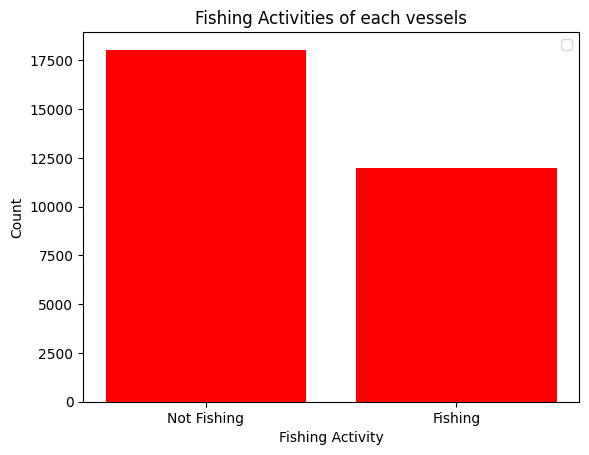

In [26]:
plt.bar(barplot_fishing.index,barplot_fishing.values,color='red')

plt.xticks([0,1],['Not Fishing', 'Fishing'])
plt.xlabel('Fishing Activity')
plt.ylabel('Count')
plt.title('Fishing Activities of each vessels')
plt.legend()

In [27]:
df['previous_fishing']=df.groupby('mmsi')['is_fishing'].shift(1)
df.head(10)

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False,True,NaN
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False,False,True
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False,True,False
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True,False,True
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False,False,False
5,120589441,2024-01-02 23:28:00,39.280294,11.898402,11.23,316.0,False,False,False
6,120589441,2024-01-03 07:45:00,33.405215,4.614154,2.05,497.0,False,True,False
7,120589441,2024-01-03 19:05:00,34.822784,31.349677,6.34,680.0,False,False,True
8,120589441,2024-01-04 01:53:00,37.638698,24.205252,3.97,408.0,False,True,False
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True,True


In [28]:
df['next_fishing']=df.groupby('mmsi')['is_fishing'].shift(-1)
df.head(50)

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing,next_fishing
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False,True,NaN,False
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False,False,True,True
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False,True,False,False
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True,False,True,False
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False,False,False,False
5,120589441,2024-01-02 23:28:00,39.280294,11.898402,11.23,316.0,False,False,False,True
6,120589441,2024-01-03 07:45:00,33.405215,4.614154,2.05,497.0,False,True,False,False
7,120589441,2024-01-03 19:05:00,34.822784,31.349677,6.34,680.0,False,False,True,True
8,120589441,2024-01-04 01:53:00,37.638698,24.205252,3.97,408.0,False,True,False,True
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True,True,True


In [29]:
df['hidden_fishing']=(
    df['suspicious_gap']&
    df['previous_fishing']&
    df['next_fishing']
)
df.head()

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing,next_fishing,hidden_fishing
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False,True,NaN,False,False
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False,False,True,True,False
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False,True,False,False,False
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True,False,True,False,False
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False,False,False,False,False


In [30]:
df['hidden_fishing'].value_counts()


hidden_fishing
False    28134
True      1866
Name: count, dtype: int64

So there are total 1866 hidden fishing activities founded

Extract Coordinates of Hidden Fishing Events
---

In [31]:
hidden_df=df.loc[df['hidden_fishing']==True]
hidden_df

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing,next_fishing,hidden_fishing
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True,True,True,True
11,120589441,2024-01-04 11:50:00,40.827271,29.469892,7.87,54.0,True,False,True,True,True
16,120589441,2024-01-05 01:51:00,34.402776,33.533117,11.28,193.0,True,False,True,True,True
19,120589441,2024-01-05 12:49:00,41.443343,9.161351,13.73,43.0,True,False,True,True,True
21,120589441,2024-01-05 15:20:00,36.559244,32.580062,13.46,73.0,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
29848,982721837,2024-04-16 16:53:00,36.912937,35.227719,13.55,59.0,True,False,True,True,True
29864,982721837,2024-04-20 08:13:00,39.512895,5.769567,3.87,60.0,True,True,True,True,True
29913,982721837,2024-04-28 18:38:00,38.793606,22.420092,2.22,94.0,True,True,True,True,True
29951,982721837,2024-05-07 21:50:00,38.885617,27.212781,3.62,145.0,True,True,True,True,True


These are your illegal fishing points.
---

In [32]:
hidden_df.shape

(1866, 11)

In [33]:
hidden_df.to_csv("hidden_fishing_points.csv", index=False)

Visualize Hidden Fishing Locations on a MAP
---

In [34]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [35]:
hidden_df.shape

(1866, 11)

In [36]:
!pip install geopandas shapely

Defaulting to user installation because normal site-packages is not writeable


In [37]:
!pip install geodatasets

Defaulting to user installation because normal site-packages is not writeable


In [38]:


import geopandas as gpd
from shapely.geometry import Point
import geodatasets

# Load world land polygons correctly
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

# Convert our hidden fishing points to GeoDataFrame
geometry = [Point(xy) for xy in zip(hidden_df['lon'], hidden_df['lat'])]
hidden_gdf = gpd.GeoDataFrame(hidden_df, geometry=geometry, crs="EPSG:4326")

# Combine all land shapes into one big polygon
land_union = world.geometry.unary_union

# Check each hidden point if it lies on land
hidden_gdf['on_land'] = hidden_gdf.geometry.within(land_union)

# Keep only points that are in the SEA
sea_points = hidden_gdf.loc[hidden_gdf['on_land'] == False]

# See how many sea points we have
sea_points.shape


C:\Users\kevin\AppData\Local\Temp\ipykernel_25532\1915218148.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  land_union = world.geometry.unary_union


(966, 13)

In [39]:
import folium

# Create a base map centered roughly on the Mediterranean
m = folium.Map(location=[38.0, 15.0], zoom_start=4)

# Add hidden fishing points
for _, row in sea_points.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m


ML HOTSPOT CLUSTERING (DBSCAN)
--

In [40]:
from sklearn.cluster import DBSCAN
coords=sea_points[['lat','lon']].to_numpy()

db=DBSCAN(eps=0.6,min_samples=13)
db.fit(coords)
sea_points['cluster']=db.labels_


C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [41]:
sea_points['cluster'].value_counts()

cluster
-1    939
 0     14
 1     13
Name: count, dtype: int64

cluster

    -1    897   → Noise (ignore these)
    1     19   → Hotspot cluster 1
    0     19   → Hotspot cluster 0
    2     16   → Hotspot cluster 2
    3     15   → Hotspot cluster 3


In [42]:
sea_points

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing,next_fishing,hidden_fishing,geometry,on_land,cluster
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True,True,True,True,POINT (-2.18759 43.73417),False,-1
16,120589441,2024-01-05 01:51:00,34.402776,33.533117,11.28,193.0,True,False,True,True,True,POINT (33.53312 34.40278),False,-1
68,120589441,2024-01-18 02:24:00,35.687479,23.941892,9.06,90.0,True,False,True,True,True,POINT (23.94189 35.68748),False,-1
92,120589441,2024-01-24 03:56:00,33.497117,12.564903,13.17,63.0,True,False,True,True,True,POINT (12.5649 33.49712),False,-1
122,120589441,2024-01-31 00:44:00,44.258463,-4.282126,11.29,131.0,True,False,True,True,True,POINT (-4.28213 44.25846),False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29772,982721837,2024-03-30 16:04:00,44.640603,13.929733,5.13,152.0,True,False,True,True,True,POINT (13.92973 44.6406),False,-1
29777,982721837,2024-03-30 22:49:00,37.089864,18.301942,12.78,51.0,True,False,True,True,True,POINT (18.30194 37.08986),False,-1
29789,982721837,2024-04-02 00:53:00,44.946987,13.206606,10.51,73.0,True,False,True,True,True,POINT (13.20661 44.94699),False,-1
29826,982721837,2024-04-11 11:59:00,36.019653,31.509346,3.22,57.0,True,True,True,True,True,POINT (31.50935 36.01965),False,-1


VISUALIZE HOTSPOT CLUSTERS ON A MAP
---

In [43]:
m=folium.Map(location=[38,15],zoom_start=4)


In [44]:
clusters=sorted(sea_points['cluster'].unique())
clusters



[-1, 0, 1]

In [45]:
import matplotlib.cm as cm
colors=cm.rainbow(np.linspace(0,1,len(clusters)))



for cluster,color in zip(clusters,colors):
   
    cluster_points=sea_points.loc[sea_points['cluster']==cluster]

    hex_color = "#{:02x}{:02x}{:02x}".format(
        int(color[0]*255),
        int(color[1]*255),
        int(color[2]*255)
    )
   

    for _,row in cluster_points.iterrows():
        folium.CircleMarker(
            location=[row['lat'],row['lon']],
            radius=3,
            color=hex_color,
            fill=True,
            fill_opacity=0.8
        ).add_to(m)
m



KDE HEATMAP (Hidden Fishing Density Map)
---

In [46]:
from folium.plugins import HeatMap
import folium
clustered_points = sea_points.loc[sea_points['cluster'] != -1]
# neglecting outliers ie:-1
heat_data=clustered_points[['lat','lon']].values.tolist()

m=folium.Map(location=[38,15],zoom_start=4)

HeatMap(heat_data,radius=13,blur=15,max_zoom=7).add_to(m)

m


# radius=13 → how big each heat bubble is

# blur=15 → smoothness

# max_zoom=7 → clarity

Calculate Hotspot Centroids (exact center of each cluster)
---

In [47]:

clusters = sea_points[sea_points['cluster'] != -1]


centroids = clusters.groupby('cluster').agg(
    center_lat=('lat', 'mean'),
    center_lon=('lon', 'mean'),
    count=('lat', 'count')
).reset_index()

centroids  



,cluster,center_lat,center_lon,count
0,0,41.778399,18.304284,14
1,1,34.013285,11.874871,13


In [48]:
type(centroids)


pandas.core.frame.DataFrame

In [49]:
import folium
from folium.plugins import HeatMap

# Heatmap
m = folium.Map(location=[38, 15], zoom_start=4)
HeatMap(sea_points[['lat','lon']].values.tolist(), radius=13).add_to(m)

# Add centroid markers
for _, row in centroids.iterrows():
    folium.Marker(
        location=[row['center_lat'], row['center_lon']],
        popup=f"Cluster {row['cluster']} | Events: {row['count']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

m

In [50]:
hotspot_points = sea_points[sea_points['cluster'] != -1]
hotspot_points.to_csv("hotspot_points.csv", index=False)

In [51]:
centroids.to_csv("cluster_centroids.csv", index=False)

In [52]:
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

removed_noise = sea_points[sea_points['cluster'] != -1]
coords = removed_noise[['lat', 'lon']].to_numpy()
labels = removed_noise['cluster']



coords_scaled = scaler.fit_transform(coords) #scaled coordinates

db_score = davies_bouldin_score(coords_scaled, labels)
db_score


0.07724527412995813

A DB score of:

    0.0 – 0.1 → Outstanding clustering

    0.1 – 0.3 → Very good

    0.3 – 1.0 → OK

    1.0 → Needs improvement